In [1]:
# se realizan las importaciones necesarios
import numpy as np
from numpy.random import normal
from numpy.random import uniform
from numpy.random import triangular
import matplotlib.pyplot as plt
print("Todas las librerías han sido importadas.")

Todas las librerías han sido importadas.


In [2]:
N=10**6

# Densidad de una esfera de plástico
Se desea medir la densidad de una esfera de plástico en $\textrm{g/cm}^3$ para lo cual se mide su masa y su diámetro. Para efectos de este problema considere que la masa de la esfera corresponde a la masa convencional de la balanza. Para determinar la masa convencional se emplea una balanza digital con una división de escala de $0.01\textrm{ g}$ y una capacidad máxima de $600\textrm{ g}$. La balanza se calibra cada tres meses y de acuerdo con el último certificado de calibración se tienen los siguientes resultados:

| Indicación de la balanza (g) | Masa de referencia (g) | Error de Indicación (g) | Incertidumbre expandida ($k=2$; Distribución normal; $95.45\%$) (g) |
|---|---|---|---|
|$0.100$|$0.100$|$0.000$|$0.007$|
|$100.000$|$100.000$|$0.000$|$0.010$|
|$199.990$|$200.000$|$-0.010$|$0.013$|
|$299.980$|$300.000$|$-0.020$|$0.016$|
|$399.970$|$400.000$|$-0.030$|$0.019$|
|$499.960$|$500.000$|$-0.040$|$0.022$|
|$589.950$|$590.000$|$-0.050$|$0.024$|

De acuerdo con los controles internos que se le realizan semanalmente a la balanza se ha determinado que la deriva entre calibraciones es de $\pm0.02\textrm{ g}$. Los cambios en las condiciones ambientales no afectan significativamente los resultados. Para determinar la masa de la esfera se coloc´o sobre el receptor de carga de balanza 10 veces y se obtuvieron los siguientes resultados:

|Número de medición|Indicación de la balanza (g)|
|---|---|
|$1$|$543.12$|
|$2$|$543.10$|
|$3$|$543.13$|
|$4$|$543.13$|
|$5$|$543.12$|
|$6$|$543.14$|
|$7$|$543.12$|
|$8$|$543.12$|
|$9$|$543.11$|
|$10$|$543.10$|

El diámetro de la esfera es medido empleando un sistema de medida donde se emplea un vernier digital cuya resolución es de $0.01\textrm{ mm}$. Las mediciones del diámetro se realizan de forma independiente de las mediciones de la masa. Las características metrolológicas del calibrador vernier empleado son las siguientes:

- **Incertidumbre por calibración:** $\pm0.03\textrm{ mm}$ reportada con un factor de cobertura $k = 2$ para una probabilidad de cobertura del $95.45\%$ considerando que sigue una distribución normal. Dentro de esta incertidumbre se incluye la resolución del instrumento.
- **Deriva instrumental entre calibraciones:** $\pm0.01\textrm{ mm}$.

Se realizaron diez mediciones del di´ametro de la esfera y se obtuvieron los siguientes resultados:

|Número de medición|Indicación del calibrador vernier (mm)|
|---|---|
|$1$|$120.02$|
|$2$|$120.09$|
|$3$|$120.12$|
|$4$|$119.94$|
|$5$|$120.01$|
|$6$|$120.06$|
|$7$|$119.95$|
|$8$|$120.07$|
|$9$|$119.96$|
|$10$|$119.91$|

In [3]:
def Densidad(m,d):
    return 6*m/(d**3*np.pi)

In [4]:
m=np.array([543.12,543.10,543.13,543.13,543.12,543.14,543.12,543.12,543.11,543.10]).reshape(10,1)+normal(0,(0.05+0.024)/2,size=(10,N))+uniform(-0.02,0.02,size=(10,N))
d=np.array([120.02,120.09,120.12,119.94,120.01,120.06,119.95,120.07,119.96,119.91]).reshape(10,1)+normal(0,0.03/2,size=(10,N))+uniform(-0.01,0.01,size=(10,N))

In [5]:
densidad=Densidad(m,d)

In [6]:
densidad=np.mean(densidad,axis=0)+np.std(densidad,axis=0)/np.sqrt(10)

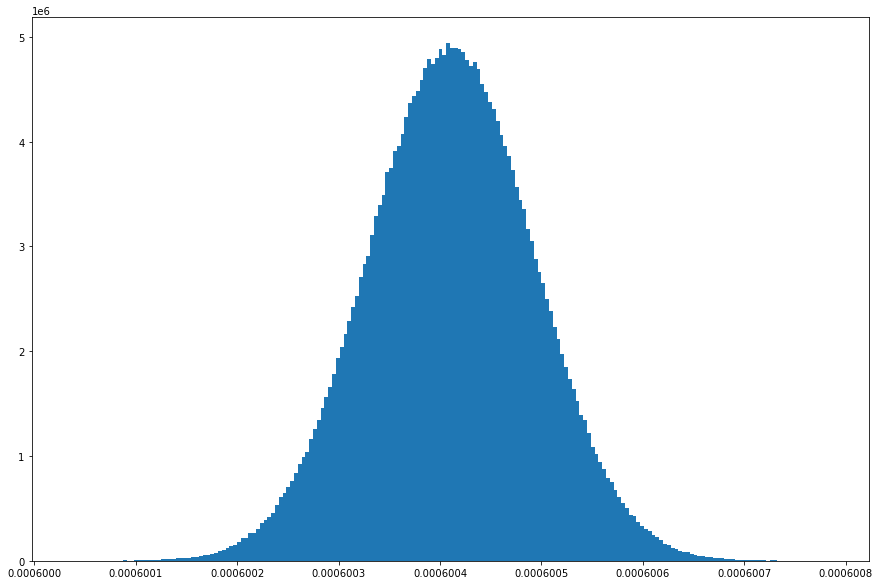

In [7]:
plt.figure(figsize=(15,10))
plt.hist(densidad,bins=200,density=True)
plt.show()

In [8]:
densidad.mean(),densidad.std()

(0.0006004109828139883, 8.120805118347727e-08)

# Dureza Brinell

Se desea realizar la medición de la dureza Brinell de una pieza metálica de acuerdo con la norma ASTM E10, donde se define la dureza Brinell como función de una fuerza aplicada F, el diámetro de la punta de acero $D$ y el diámetro medio de la muesca $d$:

$$B=\frac{2F}{\pi D^2\left(1-\sqrt{1-\frac{d^2}{D^2}}\right)}$$

Donde:
- $B$: es la dureza Brinell en ($\textrm{kp/mm}^2$).
- $F$: fuerza aplicada en ($\textrm{kp}$).
- $D$: diámetro de la punta en ($\textrm{mm}$).
- $d$: diámetro medio de la muesca en ($\textrm{mm}$).

El procedimiento de medición define como diámetro medio de la muesca, el promedio de medición de dos diámetros perpendiculares entre sí. Características metrológicas del equipo:

1. Máquina para medición de dureza Brinell: De acuerdo con el certificado de calibración la indicación de la escala de fuerza, cumple con las tolerancia requerida en ASTM E10: el error máximo permisible de la fuerza aplicada no excede $\pm 1\%$ de la medida.
2. Punta de acero de diámetro nominal de $10\textrm{ mm}$: De acuerdo con el certificado de calibración el diámetro, cumple con la tolerancia indicada en ASTM E10: la desviación máxima permitida del valor nominal es de $\pm0.005\textrm{ mm}$.
3. El certificado de calibración del microscopio utilizado para medir el diámetro de la muesca declara que el error de indicación se encuentra dentro de la tolerancia reportada por el fabricante: $\pm 0.02\textrm{ mm}$.

_Resultados de la dureza Brinell de una pieza metálica:_

Se aplica una fuerza de $3000\textrm{ kp}$ y se utiliza una punta de acero de $10\textrm{ mm}$ de diámetro nominal. Se realizan 4 mediciones en distintos puntos de la pieza a la que se le desea medir la dureza. Para cada medición, se coloca el identador sobre la pieza a la que se le desea medir dureza y se miden los diámetros de las muescas $d_1$ y $d_2$ para cada muesca. Se realizaron mediciones en 4 muescas distintas y se obtienen los siguientes resultados:

|Muesca|$1$|$2$|$3$|$4$|
|---|---|---|---|---|
|$d_1$ (mm)|$3.71$|$3.70$|$3.60$|$3.67$|
|$d_2$ (mm)|$3.65$|$3.64$|$3.63$|$3.62$|

Nótese que la diferencia máxima entre $d_1$ y $d_2$ en ningún caso es mayor a $0.06\textrm{ mm}$.

In [9]:
f=uniform(-0.01*3000,0.01*3000,size=(4,N))+3000
D=uniform(-0.005,0.005,size=(4,N))+10
d1=np.array([3.71,3.70,3.60,3.67]).reshape(4,1)+uniform(-0.02,0.02,size=(4,N))
d2=np.array([3.65,3.64,3.63,3.62]).reshape(4,1)+uniform(-0.02,0.02,size=(4,N))

In [10]:
def Brinell(f,D,d1,d2):
    return 2*f/(np.pi*D**2*(1-np.sqrt(1-((d1+d2)/2)**2/D**2)))

In [11]:
brinell=np.mean(Brinell(f,D,d1,d2),axis=0)+np.std(Brinell(f,D,d1,d2),axis=0)/np.sqrt(4)

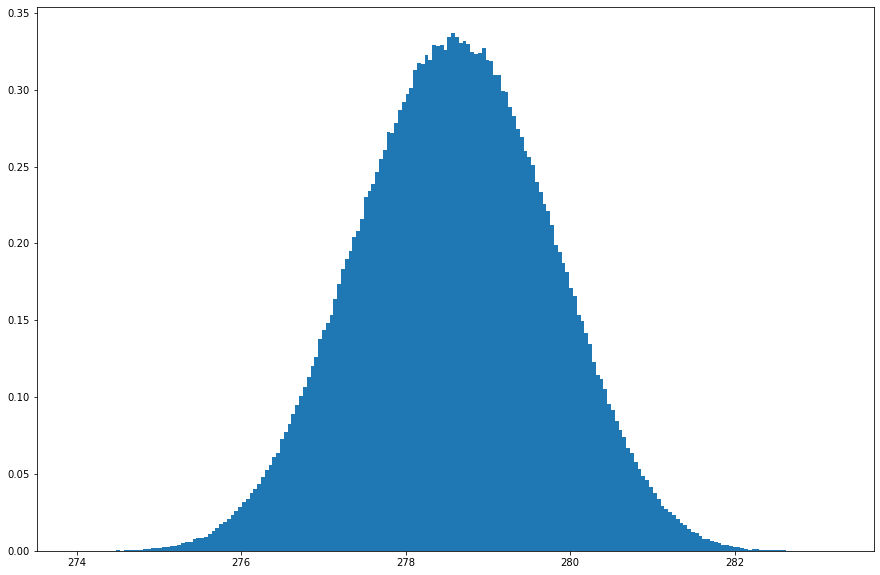

In [12]:
plt.figure(figsize=(15,10))
plt.hist(brinell,bins=200,density=True)
plt.show()

In [13]:
brinell.mean(),brinell.std()

(278.5878992816702, 1.1542588107110068)

# Frenómetro
Un taller de inspección de frenos para vehículos automotores desea calibrar un frenómetro en su escala de medición de fuerza. Para ello se emplea una barra de acero que se coloca sobre el frenómetro de tal forma que los apoyos queden sujetos a la carcasa de un motor que es concéntrico al eje del rodillo.

<figure>
    <img src="Figuras/Frenómetro.png" alt="Frenómetro">
    <figcaption>Figura 1. Calibración de frenómetro</figcaption>
</figure>

En cada una de las muescas se puede colocar una pesa de $30\textrm{ kg }\pm 5\textrm{ g}$ de tal forma que se induce una fuerza patrón sobre el frenómetro. La fuerza patrón generada por el sistema de medición conformado por la barra y la pesa corresponde a:

$$F_p=\frac{2mgL}{1000D}$$

Donde:

- $F_p$: es la fuerza patrón generada sobre el frenómetro, en $\textrm{kN}$.
- $L$: es la longitud certidicada de la barra, en $\textrm{m}$.
- $m$: es la masa de la pesa de $30\textrm{ kg}$ reportada en $\textrm{kg}$.
- $g$: es la aceleración de la gravedad, en $\textrm{m/s}^2$.
- $D$: es el diámetro del rodillo, en $\textrm{m}$.

El diámetro promedio del rodillo de acuerdo con las especificaciones del fabricante corresponde a $(202\pm2)\textrm{ mm}$. La aceleración de la gravedad para Costa Rica corresponde a $9.779\,06\textrm{ m/s}^2$ con una incertidumbre estándar de $0.000\,35\textrm{ m/s}^2$, con $k=1$ considerando una distribución trapezoidal.

Para verificar el frenómetro se decide colocar la pesa de $30\textrm{ kg}$ en la muesca ubicada a una distancia correspondiente a la fuerza nominal de $4\textrm{ kN}$. En ese punto la longitud certificada de la barra corresponde a: $(1373.2\pm2.0)\textrm{ mm}$ (reportada con $k = 2$ para una probabilidad de cobertura del $95 \%$ considerando que sigue una distribución normal). Al colocar la pesa la barra se deforma y la distancia certificada puede variar en $\pm4\textrm{ mm}$ adicionales de la distancia real. Se realiza una comprobación de la indicación de frenómetro en cinco ocasiones y se obtuvieron los siguientes resultados:

|Número de muestra| Indicación del frenómetro (kN) |
|---|---|
|$1$|$4.07$|
|$2$|$4.05$|
|$3$|$4.07$|
|$4$|$4.05$|
|$5$|$4.06$|

Todas las lecturas fueron estables. El equipo presenta una resolución de $0.01\textrm{ kN}$.

In [14]:
from scipy.stats import trapz

In [15]:
def ErrorFrenómetro(I,m,g,L,D):
    return 2*m*g*L/(1000*D)

In [16]:
i=np.array([4.07,4.05,4.07,4.05,4.06]).reshape(5,1)+uniform(-0.01/2,0.01/2,size=(5,N))
m=30+uniform(-5e-3,5e-3,size=(5,N))
# g=9.77906+trapz.rvs(c=0,d=0.00035,size=(5,N))
g=9.77906+uniform(-0.00035,0.00035,size=(5,N))
L=(1373.2+normal(0,2/2,size=(5,N))+uniform(-4,4,size=(5,N)))/1000
D=(202+uniform(-2,2,size=(5,N)))/1000

In [17]:
e=np.mean(ErrorFrenómetro(i,m,g,L,D),axis=0)+np.std(ErrorFrenómetro(i,m,g,L,D),axis=0)/np.sqrt(5)

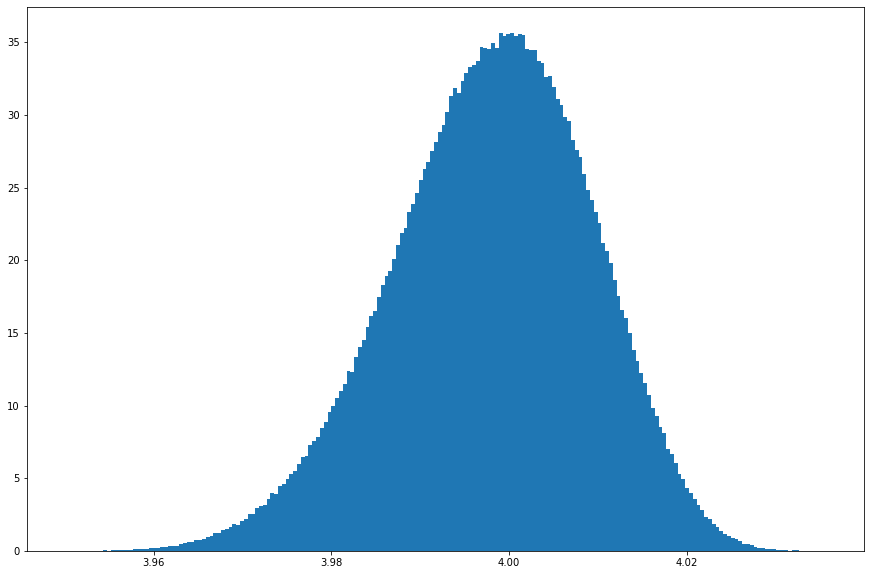

In [18]:
plt.figure(figsize=(15,10))
plt.hist(e,bins=200,density=True)
plt.show()

In [19]:
e.mean(),e.std()

(3.9980016735222197, 0.011087848965658568)

In [20]:
0.1/(2*e.std())

4.509440934383275

# Triángulo Rectángulo

Se dibuja el tri´angulo rectángulo mostrado en la Figura 2 sobre una lámina plana. Una vez trazado se emplea una regla rígida y se miden las longitudes de los lados A y B. Se realizaron 5 mediciones cada uno de estos dos lados y las dimensiones obtenidas fueron:

$$A=20.0\textrm{ cm}$$
$$B=17.3\textrm{ cm}$$

<figure>
    <img src="Figuras/Triángulo.png" alt="Triángulo">
    <figcaption>Figura 2. Triángulo rectángulo</figcaption>
</figure>

Considere que tanto la incertidumbre del ángulo recto como la de posicionamiento del cero de la regla son despreciables, así como los efectos de expansión térmica. Además, considere que la única incertidumbre que afecta tanto la medición de $A$ como de $B$ es la división de escala de la regla la cual es de $1\textrm{ mm}$.

_Requerimientos:_

Halle el área del triángulo y repórtela con su respectiva incertidumbre expandida para una probabilidad de cobertura del $95.45\%$. Muestre todos sus cálculos incluyendo las incertidumbres estándar, los coeficientes de sensibilidad con sus respectivas unidades y la determinación del factor de cobertura. No es necesario que realice presupuesto de incertidumbres ni gráfico de pesos de incertidumbres pero si analice cuidadosamente el Teorema del Límite Central para determinar la incertidumbre expandida.

In [21]:
def Área(a,b):
    return b*np.sqrt(a**2-b**2)/2

In [22]:
a=20+uniform(-1e-1/2,1e-1/2,size=N)
b=17.3+uniform(-1e-1/2,1e-1/2,size=N)

In [23]:
área=Área(a,b)

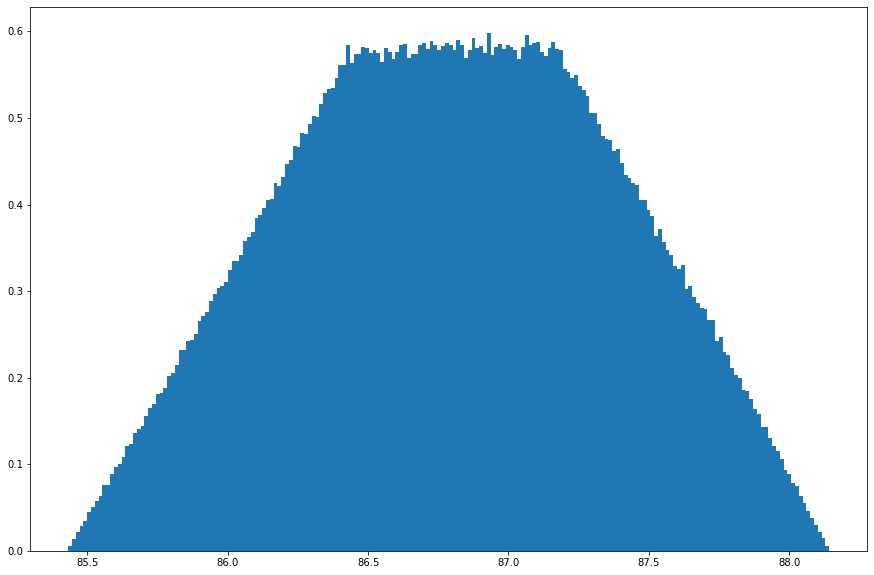

In [24]:
plt.figure(figsize=(15,10))
plt.hist(área,bins=200,density=True)
plt.show()

In [25]:
área.mean(),área.std()

(86.80314964643894, 0.5737269120158619)

# Potencia disipada
Supongamos que se aplica una diferencia de potencial $V$ a los bornes de una resistencia cuyo valor depende de la temperatura $t$, de la resistencia $R_0$ a la temperatura definida $t_0$ y del coeficiente lineal de temperatura $\alpha$. La potencia disipada $P$ está definida por:

$$P=\frac{V^2}{R_0\left[1+\alpha\left(t-t_0\right)\right]}$$

Donde:

- $P$ es la potencia disipada, en $\textrm{W}$.
- $V$ es la tensión eléctrica, en $\textrm{V}$.
- $R_0$ es la resistencia en $\Omega$ a una temperatura $t_0$.
- $\alpha$ es el coeficiente de temperatura, en $\textrm{K}^{-1}$.
- $t$ es la temperatura, en $\textrm{K}$.
- $t_0$ es la temperatura de referencia, en $\textrm{K}$.

Suponga que se conocen las incertidumbres estándar de las variables $V$, $R_0$, $\alpha$ y $t$ y corresponden a $u(V)$, $u(R_0)$, $u(\alpha)$ y $u(t)$. Considere que la incertidumbre de t0 es despreciable $u(t0) = 0$.

In [26]:
V=50+normal(0,0.2,size=N)
R0=100+normal(0,0.6,size=N)
alpha=3.9e-3+normal(0,0.3e-3,size=N)
t=30.5+normal(0,2.3,size=N)
t0=20

In [27]:
def Potencia(V,R0,alpha,t,t0):
    return V**2/(R0*(1+alpha*(t-t0)))

In [28]:
potencia=Potencia(V,R0,alpha,t,t0)

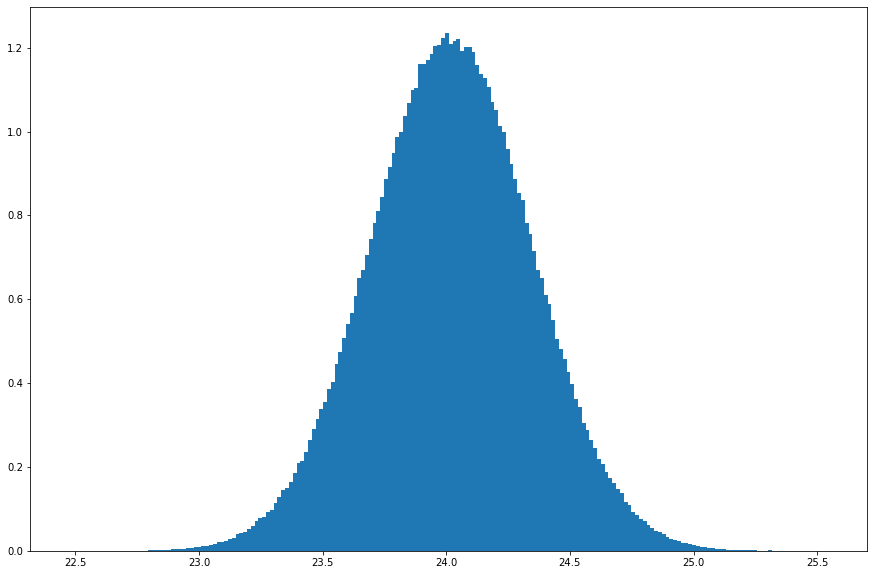

In [29]:
plt.figure(figsize=(15,10))
plt.hist(potencia,bins=200,density=True)
plt.show()

In [30]:
potencia.mean(),potencia.std()

(24.01954400140582, 0.32577000512726995)

# Triángulo escaleno

Se tiene un triÁngulo al que se le midieron sus tres lados $a$, $b$ y $c$. Cada uno de estos tres lados se midió con una regla con una división de escala de $1\textrm{ mm}$ de tal manera que es posible resolver valores cada $0.5\textrm{ mm}$, esto significa que todas las mediciones tienen un error máximo de $\pm 0.5\textrm{ mm}$. Se realizaron $7$ mediciones de cada lado y en todos los casos se obtuvieron los mismos resultados para los lados del triángulo, los cuales corresponden a:

$$a=100.0\textrm{ mm}$$
$$b=90.0\textrm{ mm}$$
$$c=80.0\textrm{ mm}$$

Suponga que las incertidumbres por calibración, expansión térmica, deriva y cualquier otro efecto son despreciables.

In [31]:
def ÁreaHerón(a,b,c):
    s=(a+b+c)/2
    return np.sqrt(s*(s-a)*(s-b)*(s-c))

In [32]:
a=100+uniform(-1/2,1/2,size=N)
b=90+uniform(-1/2,1/2,size=N)
c=80+uniform(-1/2,1/2,size=N)

In [33]:
área=ÁreaHerón(a,b,c)

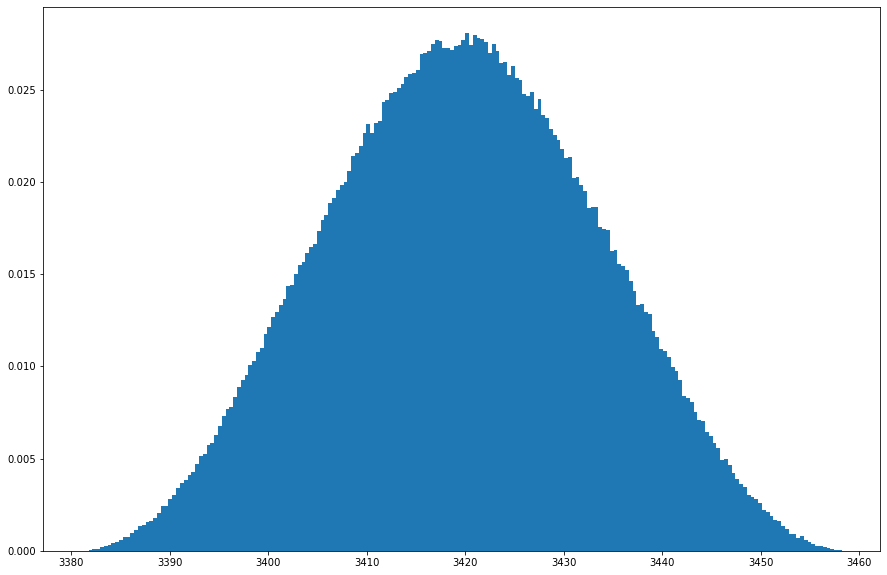

In [34]:
plt.figure(figsize=(15,10))
plt.hist(área,bins=200,density=True)
plt.show()

In [35]:
área.mean(),área.std()

(3419.6613282713042, 13.491668690599532)

# Gravimetría

Se desea construir un péndulo simple para medir la aceleración gravitacional en el PLANETA TIERRA. Si se desprecia el efecto de la aceleración de Coriolis producida por el hecho de que la tierra no es exactamente un marco de referencia no inercial y que los efectos de la aceleración de la Tierra respecto al Sol u otros cuerpos en el universo es despreciable, la ecuación que relaciona el período $T$ con la longitud del péndulo $L$ hasta el centro de percursión, la aceleración de la gravedad $g$ y su amplitud de oscilación $\theta$ es la siguiente:

$$T=2\pi\sqrt{\frac{L}{g}}\left[1+\left(\frac{1}{2}\right)^2\sin^2{\left(\frac{\theta}{2}\right)}+\left(\frac{1\cdot3}{2\cdot4}\right)^2\sin^4{\left(\frac{\theta}{2}\right)}+\left(\frac{1\cdot3\cdot5}{2\cdot4\cdot6}\right)^2\sin^6{\left(\frac{\theta}{2}\right)}+\dots\right]$$

In [36]:
def factorial(n):
    factorial=1
    if int(n) >= 1:
        for i in range (1,int(n)+1):
            factorial = factorial * i
    return factorial

In [37]:
def Serie(theta,N):
    n=0
    suma=0
    while n<N:
        suma+=(factorial(2*n)/(2**(2*n)*(factorial(n))**2))**2*np.sin(theta/2)**(2*n)
        n+=1
    return suma

In [38]:
def Gravedad(L,T,theta,n):
    return (2*np.pi)**2*L*Serie(theta,n)**2/T**2

In [39]:
L=1+normal(0,0.002/2,size=N)
theta=(12+uniform(-1,1,size=N))*np.pi/180
T=2.015+normal(0,0.001,size=N)

In [40]:
gravedad=Gravedad(L,T,theta,6)

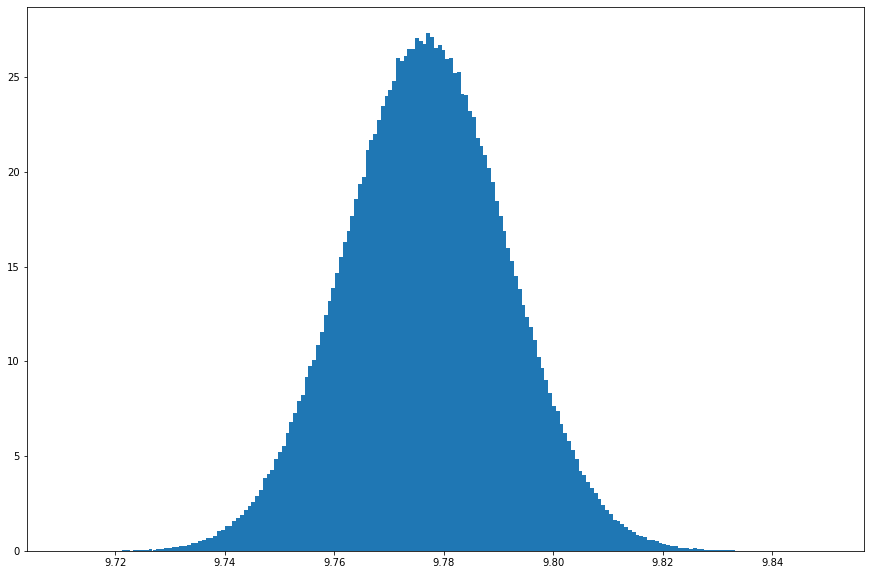

In [41]:
plt.figure(figsize=(15,10))
plt.hist(gravedad,bins=200,density=True)
plt.show()

In [42]:
gravedad.mean(),2*gravedad.std()

(9.776844530822729, 0.029417393784282365)